# Set up

Dataset : https://www.dtic.upf.edu/~ocelma/MusicRecommendationDataset/lastfm-360K.html



credits : https://www.last.fm/


In [1]:
!wget http://mtg.upf.edu/static/datasets/last.fm/lastfm-dataset-360K.tar.gz

--2019-05-28 08:54:01--  http://mtg.upf.edu/static/datasets/last.fm/lastfm-dataset-360K.tar.gz
Resolving mtg.upf.edu (mtg.upf.edu)... 84.89.139.55
Connecting to mtg.upf.edu (mtg.upf.edu)|84.89.139.55|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569202935 (543M) [application/x-gzip]
Saving to: ‘lastfm-dataset-360K.tar.gz’

lastfm-dataset-360K 100%[===================>] 542.83M   732KB/s    in 29m 7s  

2019-05-28 09:23:09 (318 KB/s) - ‘lastfm-dataset-360K.tar.gz’ saved [569202935/569202935]



In [0]:
!mkdir data
!tar -xf lastfm-dataset-360K.tar.gz -C data

In [0]:
user_plays_path = 'data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv'
user_profile_path = 'data/lastfm-dataset-360K/usersha1-profile.tsv'

In [0]:
import pandas as pd

In [0]:
play_df = pd.read_csv(user_plays_path, sep="\t", header=None)
user_df = pd.read_csv(user_profile_path, sep="\t", header=None)

In [0]:
play_df.columns = ['user_id', 'artist_id', 'artist_name', 'played_times']

In [13]:
play_df.head()

,user_id,artist_id,artist_name,played_times
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


In [0]:
user_df.columns = ['user_id', 'gender', 'age', 'country', 'signup_date']

In [15]:
user_df.head()

,user_id,gender,age,country,signup_date
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007"
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007"
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006"
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008"
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006"


In [16]:
combined_df = pd.merge(user_df, play_df)
combined_df.head()

,user_id,gender,age,country,signup_date,artist_id,artist_name,played_times
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


In [24]:
tmp = combined_df[combined_df.notnull()]
tmp.count()

user_id         17535569
gender          15948106
age             13896298
country         17535569
signup_date     17535569
artist_id       17309433
artist_name     17535365
played_times    17535569
dtype: int64

In [0]:
import seaborn as sns
sns.set(style="darkgrid")

In [0]:
a = tmp.count()

In [0]:
names, counts = list(dict(a).keys()), list(dict(a).values())

In [38]:
names, counts

(['user_id',
  'gender',
  'age',
  'country',
  'signup_date',
  'artist_id',
  'artist_name',
  'played_times'],
 [17535569,
  15948106,
  13896298,
  17535569,
  17535569,
  17309433,
  17535365,
  17535569])

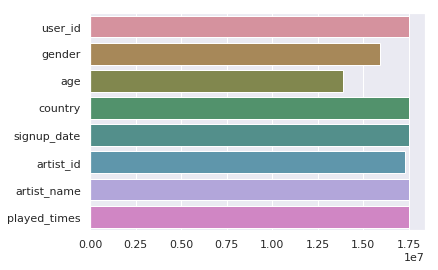

In [42]:
sns.barplot(counts, names, saturation=0.5, palette='husl')

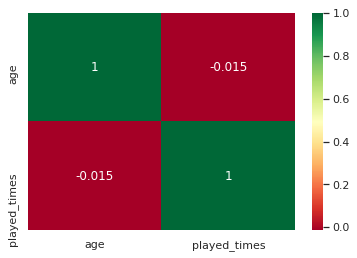

In [49]:
corrmat = combined_df.corr(method='pearson')
top_corr_features = corrmat.index
sns.heatmap(combined_df[top_corr_features].corr(method='pearson'), annot=True, cmap="RdYlGn")

In [50]:
top_corr_features

Index(['age', 'played_times'], dtype='object')

In [52]:
data = combined_df.drop(['age', 'gender', 'signup_date', 'artist_id'], axis=1).as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [53]:
data.shape

(17535569, 4)

In [0]:
!pip install --quiet gensim

In [0]:
from gensim.models import Word2Vec

Gensim reference: https://radimrehurek.com/gensim/models/word2vec

In [0]:
training_data = [list([str(j) for j in i]) for i in data]

In [67]:
training_data[0]

['00000c289a1829a808ac09c00daf10bc3c4e223b',
 'Germany',
 'betty blowtorch',
 '2137']

In [0]:
model = Word2Vec(training_data, window=data.shape[1], min_count=1, workers=4)

In [70]:
model.train(training_data, total_examples=len(training_data)/2, epochs=10)

(612743021, 701422760)

In [72]:
model.wv.most_similar(training_data[0], topn=3)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('bc4d6e71598df7ad0ab75d2041cf26047b58c69f', 0.7334753274917603),
 ('ff23ba0378aa02fdbaeade69dacb077b2af70f23', 0.730549693107605),
 ('e9dc5fe6bc7a3ccb1456060a84b01451bb74c71a', 0.7300025820732117)]

In [77]:
training_data[0]

['00000c289a1829a808ac09c00daf10bc3c4e223b',
 'Germany',
 'betty blowtorch',
 '2137']

In [0]:
# test one
t = set(combined_df[combined_df['user_id'].isin(['00000c289a1829a808ac09c00daf10bc3c4e223b'])]['artist_name'])

In [0]:
# most similar prediction one
p1 = set(combined_df[combined_df['user_id'].isin(['bc4d6e71598df7ad0ab75d2041cf26047b58c69f'])]['artist_name'])

In [87]:
t.intersection(p1) # the user at training_data[0] is similar to the predicted user 1 having one artist in common

{'die Ärzte'}

In [0]:
# most similar prediction two
p2 = set(combined_df[combined_df['user_id'].isin(['ff23ba0378aa02fdbaeade69dacb077b2af70f23'])]['artist_name'])

In [89]:
t.intersection(p2) # the user at training_data[0] is similar to the predicted user 1 having 2 artists in common

{'die Ärzte', 'red hot chili peppers'}

In [0]:
# most similar prediction three
p3 = set(combined_df[combined_df['user_id'].isin(['e9dc5fe6bc7a3ccb1456060a84b01451bb74c71a'])]['artist_name'])

In [91]:
t.intersection(p3) # the user at training_data[0] is similar to the predicted user 1 having 2 artists in common

{'die Ärzte', 'the killers'}

In [92]:
# lets check a random user

import numpy as np

rand_num = np.random.randint(1, len(training_data))
rand_num

16489753

In [93]:
# prediction
predictions = model.wv.most_similar(training_data[16489753], topn=3)
predictions

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('f0a0b763fa735872431943eaafd437984dfe2340', 0.7196488976478577),
 ('eaa2a89a3c8f17d0fe6842a433ceb06d7889e31e', 0.7191567420959473),
 ('048f838379756e9254a41f08685128426d8a3af4', 0.7110034823417664)]

In [94]:
training_data[16489753]

['f0bdf7e5df021f3ba51161ebae78e49a7fd9c075', 'Australia', 'bloc party', '523']

In [0]:
# test 2
t2 = set(combined_df[combined_df['user_id'].isin(['f0bdf7e5df021f3ba51161ebae78e49a7fd9c075'])]['artist_name'])

In [97]:
for i in predictions:
  p = set(combined_df[combined_df['user_id'].isin([i[0]])]['artist_name'])
  print('{} - {} as common artists'.format(i[0], t.intersection(p)))

f0a0b763fa735872431943eaafd437984dfe2340 - {'red hot chili peppers', 'dropkick murphys'} as common artists
eaa2a89a3c8f17d0fe6842a433ceb06d7889e31e - {'judas priest'} as common artists
048f838379756e9254a41f08685128426d8a3af4 - set() as common artists


third one has no common artist...then why was it similar to the given input? lets check

In [100]:
combined_df[combined_df['user_id'].isin(['048f838379756e9254a41f08685128426d8a3af4'])][:5]

,user_id,gender,age,country,signup_date,artist_id,artist_name,played_times
308180,048f838379756e9254a41f08685128426d8a3af4,m,23.0,Australia,"Apr 16, 2007",66fc5bf8-daa4-4241-b378-9bc9077939d2,tool,343
308181,048f838379756e9254a41f08685128426d8a3af4,m,23.0,Australia,"Apr 16, 2007",d9962a24-5dba-44c0-b19a-688b7495c375,cog,326
308182,048f838379756e9254a41f08685128426d8a3af4,m,23.0,Australia,"Apr 16, 2007",1fb29fcd-28a1-4ace-b5f2-431d085ee9e1,the butterfly effect,320
308183,048f838379756e9254a41f08685128426d8a3af4,m,23.0,Australia,"Apr 16, 2007",ee1ed7fa-26d6-4022-be87-74ca4adcb681,grinspoon,286
308184,048f838379756e9254a41f08685128426d8a3af4,m,23.0,Australia,"Apr 16, 2007",9ee2638f-c3a3-4532-bc08-54d397241c2a,karnivool,254


In [101]:
combined_df[combined_df['user_id'].isin(['f0bdf7e5df021f3ba51161ebae78e49a7fd9c075'])][:5]

,user_id,gender,age,country,signup_date,artist_id,artist_name,played_times
16489751,f0bdf7e5df021f3ba51161ebae78e49a7fd9c075,m,18.0,Australia,"Jul 23, 2008",ca891d65-d9b0-4258-89f7-e6ba29d83767,iron maiden,1133
16489752,f0bdf7e5df021f3ba51161ebae78e49a7fd9c075,m,18.0,Australia,"Jul 23, 2008",847e8284-8582-4b0e-9c26-b042a4f49e57,placebo,1068
16489753,f0bdf7e5df021f3ba51161ebae78e49a7fd9c075,m,18.0,Australia,"Jul 23, 2008",8c538f11-c141-4588-8ecb-931083524186,bloc party,523
16489754,f0bdf7e5df021f3ba51161ebae78e49a7fd9c075,m,18.0,Australia,"Jul 23, 2008",ba0d6274-db14-4ef5-b28d-657ebde1a396,the smashing pumpkins,409
16489755,f0bdf7e5df021f3ba51161ebae78e49a7fd9c075,m,18.0,Australia,"Jul 23, 2008",b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d,the beatles,373


they are similar as they are from similar country?....

In [0]:
artist_grouped_df = combined_df.groupby('artist_id')

In [107]:
len(combined_df), len(artist_grouped_df)

(17535569, 160112)

In [0]:
artist_grouped_df.apply(lambda df: df.columns)